# Code for Lecture 2: data manipulation and visualization

We begin by loading the various libraries that we'll use, and setting the plotting parameters

In [1]:
library(plyr)
library(tidyverse)
library(scales)
library(nycflights13)

# set a simple black & white theme for our plots
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Daily volume of flights

We start by preparing the data, computing the total number of flights on each day in February.

In [2]:
plot_data <- flights %>%
  filter(month == 2) %>%
  mutate(date=as.Date(paste(year, month, day, sep='-'))) %>%
  group_by(date) %>%
  summarize(n=n())

head(plot_data)

date,n
<date>,<int>
2013-02-01,926
2013-02-02,682
2013-02-03,814
2013-02-04,932
2013-02-05,896
2013-02-06,901


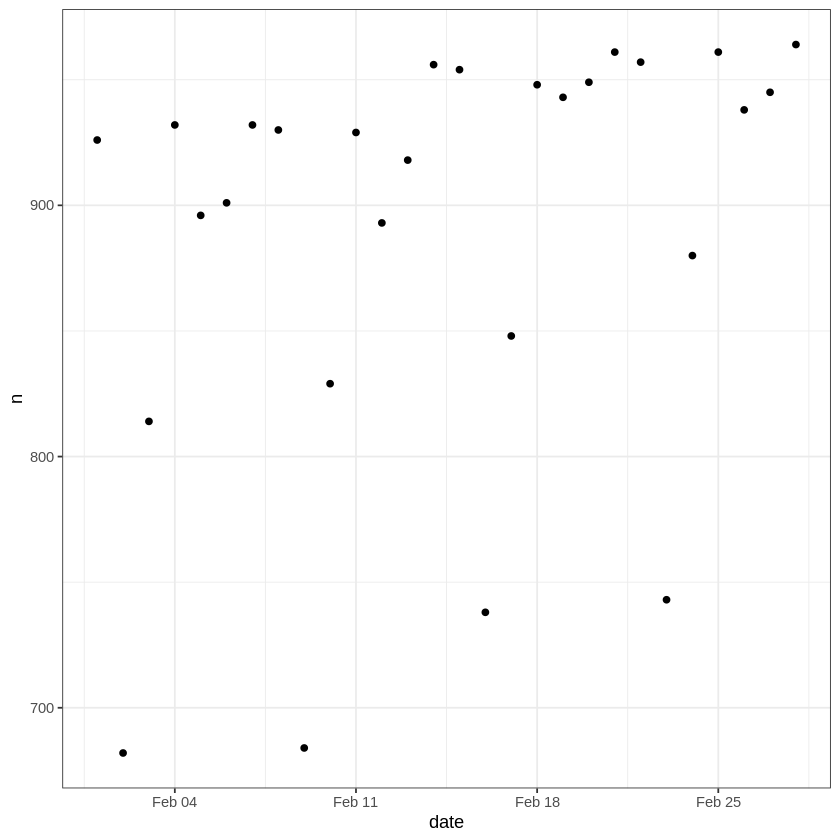

In [3]:
# default scatterplot
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point()

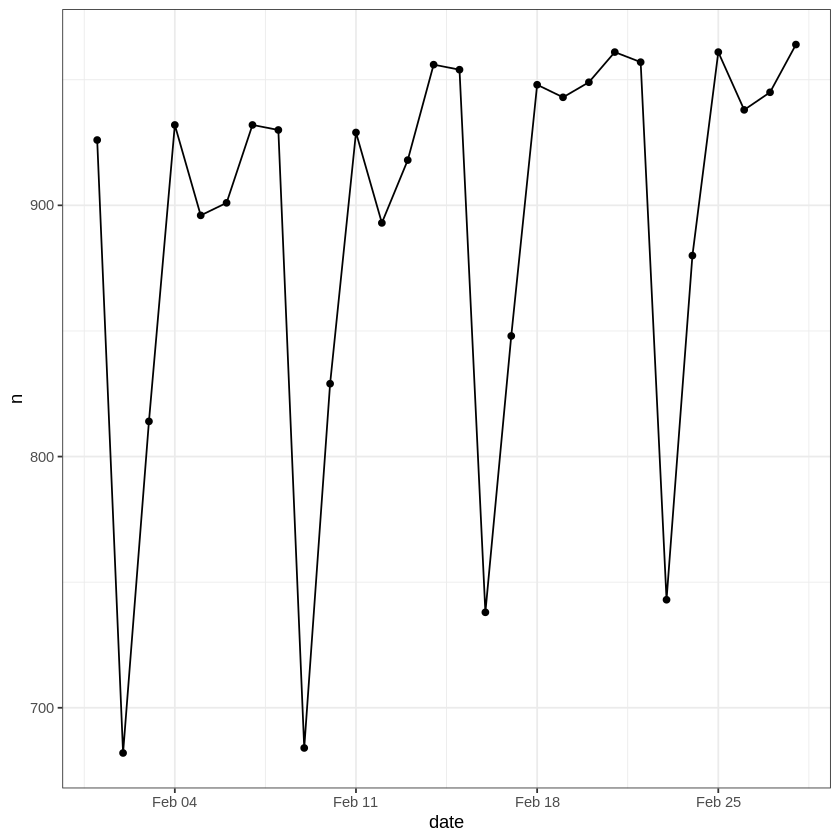

In [4]:
# connect the points with lines
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point() +
  geom_line()

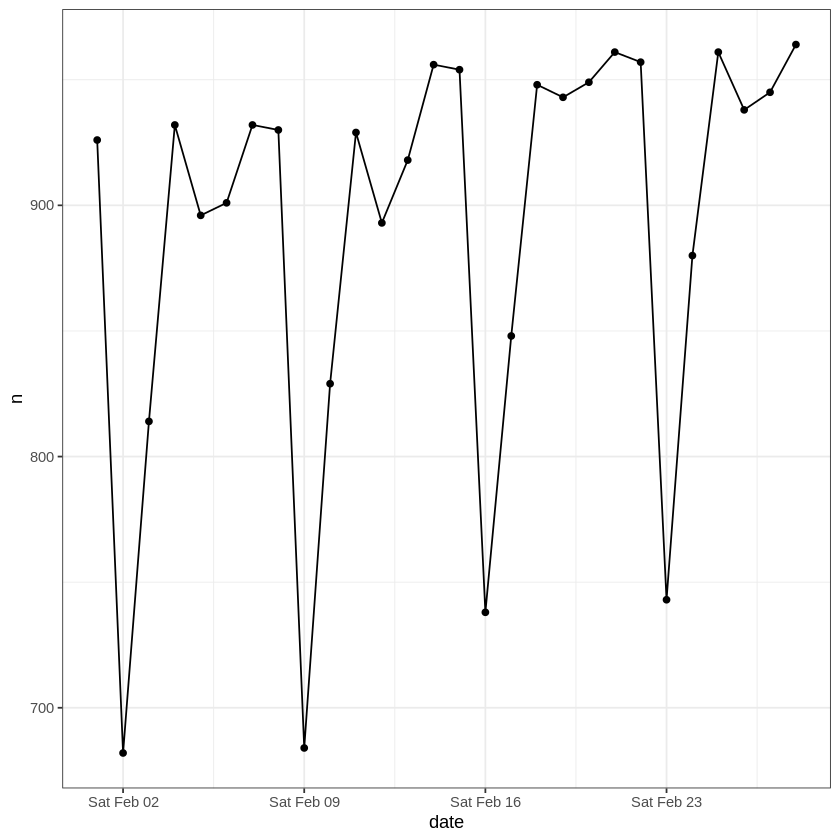

In [5]:
# compute the saturdays
saturdays <- plot_data %>%
  filter(strftime(date, format='%u') == 6) %>%
  select(date)

# plot with saturdays marked
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point() +
  geom_line() +
  scale_x_date(breaks=saturdays$date, date_label='%a %b %d')

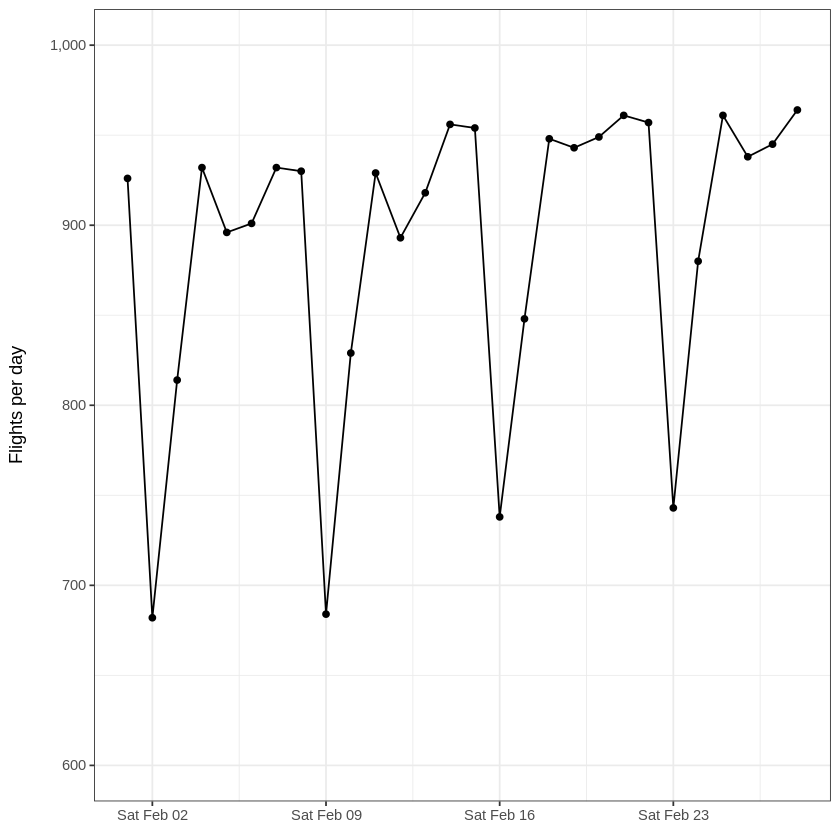

In [6]:
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point() +
  geom_line() +
  scale_x_date(element_blank(), breaks=saturdays$date, date_label='%a %b %d') +
  scale_y_continuous("Flights per day\n", limits=c(600, 1000), labels=comma)

## Stop-and-frisk

In [7]:
load('../data/sqf.Rdata')

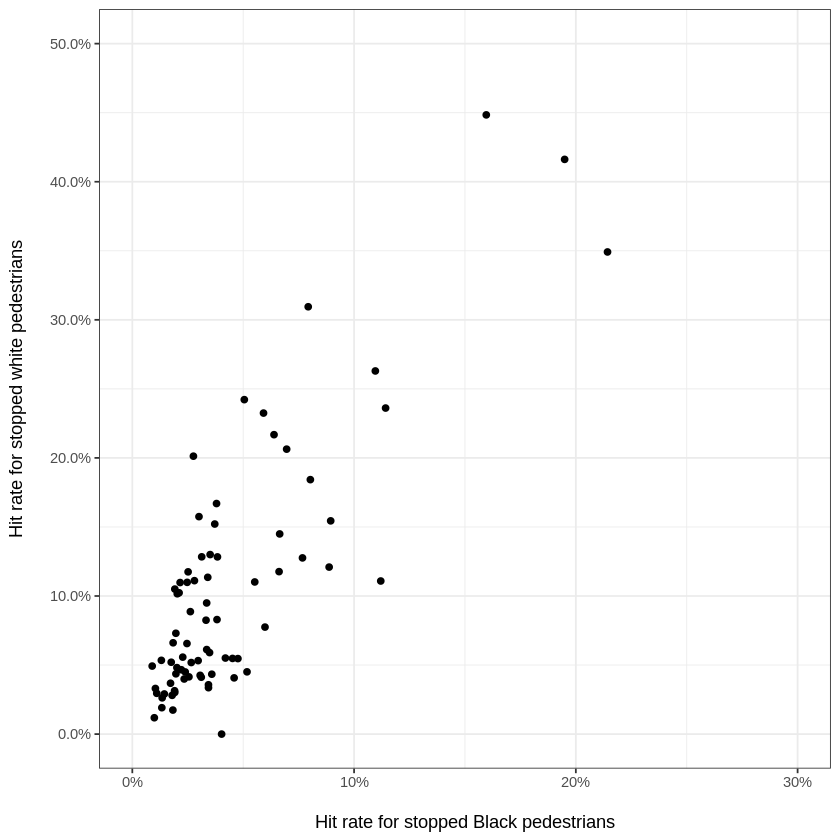

In [8]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('\nHit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .3)) +
  scale_y_continuous('Hit rate for stopped white pedestrians\n',
                     labels=percent, limits=c(0, .5))

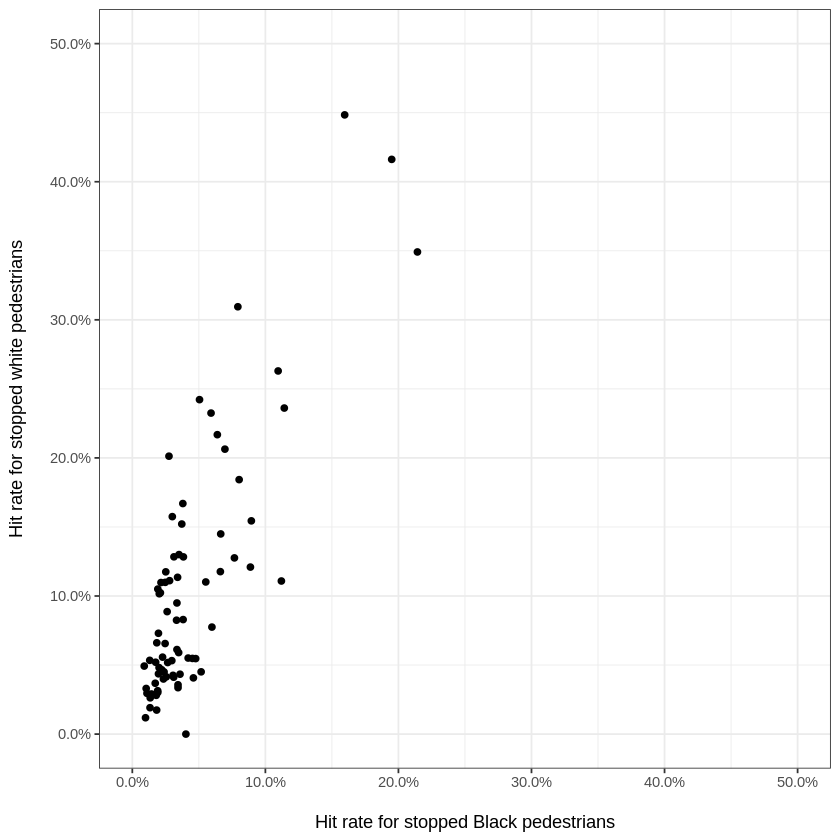

In [9]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('\nHit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for stopped white pedestrians\n',
                     labels=percent, limits=c(0, .5))

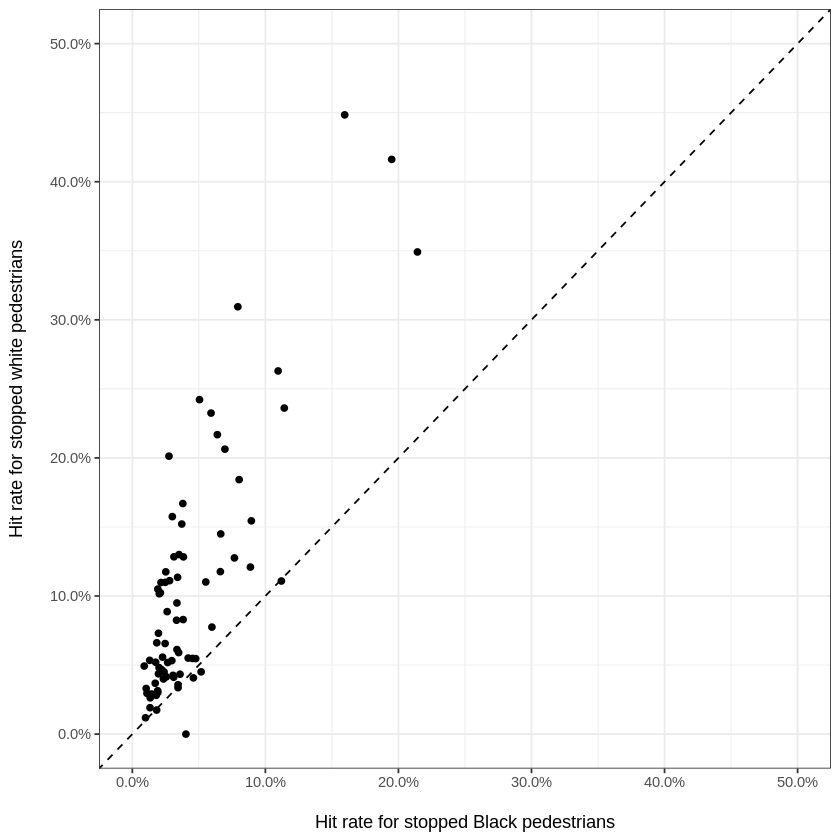

In [10]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype='dashed') +
  scale_x_continuous('\nHit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for stopped white pedestrians\n',
                     labels=percent, limits=c(0, .5))